In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
# 훈련 데이터, 테스트 데이터 나누기
# 인풋 데이터들 2차원으로 만들기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_input, test_input, train_target, test_target = \
train_test_split(perch_length, perch_weight, random_state = 42)

In [6]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [7]:
from sklearn.neighbors import KNeighborsRegressor

In [8]:
knr = KNeighborsRegressor(n_neighbors = 3)
knr

KNeighborsRegressor(n_neighbors=3)

In [9]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [10]:
### 예측데이터 : 50
### 산점도로 시각화 : 훈련데이터와 예측데이터, 이웃데이터 포함
knr.predict([[100]])

array([1033.33333333])

In [11]:
distances, indexes = knr.kneighbors([[100]])
indexes

array([[34,  8, 14]], dtype=int64)

In [12]:
import matplotlib.pyplot as plt

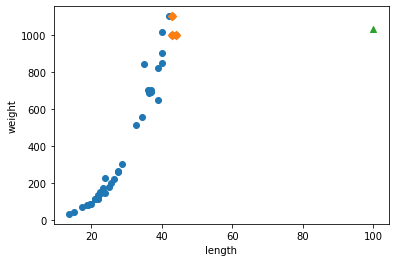

In [13]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, knr.predict([[100]]), marker='^')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [14]:
### 범위안에 들어오는 값은 kNN으로 예측이 가능하지만 범위를 벗어나면 예측이 힘들어짐

## 선형회귀(Linear Regression)
##### - 많이 사용되는 대표적인 회귀 알고리즘
##### - 비교적 간단하고, 성능이 뛰어나기 때문에 회귀모델 수행시 초반에 주로 진행합니다.
##### - 선형회귀의 역할 : 하나의 특성을 가장 잘 나타내는 직선을 찾아내는 것이 주 역할
##### - 직선을 '추세선'이라고 합니다.
##### - 선형회귀 알고리즘 : 1차 방정식 (y = ax + b)
##### - 선형회귀 클래스(모델) : LinearRegression
##### - 사용되는 패키지 : sklearn.linear_model

In [15]:
### 선형회귀 클래스(모델) 생성하기
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [ ]:
### 사용 데이터 : train_input, train_target, test_input, test_target
### 예측 데이터 : 길이 50cm

# lr 모델 훈련 > 예측데이터로 예측하기..

In [17]:
lr.fit(train_input, train_target)

LinearRegression()

In [19]:
lr.predict([[50]])

array([1241.83860323])

In [24]:
### 일차방정식의 기울기와 y절편값 확인하기
# 일차 방정식 : y = ax + b
# a : 기울기(coef_)
# b : y절편(intercept_)
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


In [ ]:
### 추세선을 이용하여 예측데이터 예측가능한지 확인하기
# - 예측데이터로 사용할 수 있을지 확인
# - 산점도를 이용해서 확인하기
# - 훈련데이터, 예측데이터 산점도로 그리기.

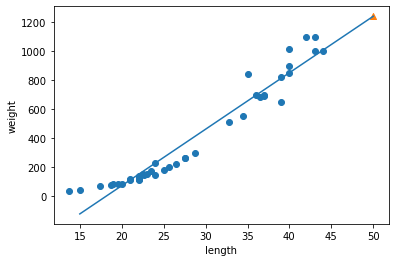

In [28]:
plt.scatter(train_input, train_target)

plt.scatter(50, lr.predict([[50]]), marker='^')

# 추세선 그리기
# 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선을 의미함
plt.plot([15,50],[lr.coef_ * 15 + lr.intercept_, 
                  lr.coef_ * 50 + lr.intercept_])

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [ ]:
### 훈련데이터와 테스트데이터의 과적합여부 확인하기.
# - KNN은 과소적합이 나왔었습니다.
# - LR 모델은 개선이 되었는지 확인..

## (해석)
# - 테스트 결과가 다소 낮게 나왔으며, 훈련데이터는 높은편,
# - 다소 차이는 있으나 우수한 모델로 평가는 할 수 있음
# - 단, 훈련데이터와 테스트데이터의 결정계수의 차이는
#       의심을 해봐야 합니다.

### 그래프 왼쪽 하단의 산점도 분포가 조금 특이합니다.
# - 약간의 round(곡선)을 띄고 있습니다.
# - 추세선의 왼쪽 하단으로 직선을 연장 했을 때,
#   y축 0 이하로 넘어갑니다. 무게는 0보다 작을 수 없습니다.
#   음수를 예측하면 잘못된 모델 입니다.

In [29]:
lr.score(test_input, test_target)

0.8247503123313558

In [31]:
lr.score(train_input, train_target)

0.939846333997604

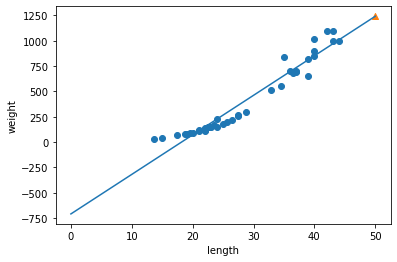

In [32]:
plt.scatter(train_input, train_target)

plt.scatter(50, lr.predict([[50]]), marker='^')

# 추세선 그리기
# 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선을 의미함
plt.plot([0,50],[lr.coef_ * 0 + lr.intercept_, 
                 lr.coef_ * 50 + lr.intercept_])

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

## 다항회귀분석
##### - 다항식을 사용한 선형회귀를 '다항회귀'라고도 합니다.
##### - 다항식(이차방정식) : y = ax2 + bx + c
##### - a와b : 계수라고 칭합니다.(기울기 포함)
##### - c : y절편

In [ ]:
### 훈련데이터 train_input을 [[제곱된값 1개, 원래값 1개], [], []]
### train_poly

In [43]:
train_poly = np.column_stack((train_input**2, train_input))
train_poly.shape

(42, 2)

In [44]:
test_poly = np.column_stack((test_input**2, test_input))
test_poly.shape

(14, 2)

In [ ]:
# - 객체(모델) 생성..
# - 훈련모델 생성
# - 예측데이터 ; 길이 50으로 무게 예측
# - 계수 확인 (coef_, intercept_)
# - 산점도 그리기 : 훈련데이터, 예측데이터, 추세선

In [46]:
lr = LinearRegression()
lr

LinearRegression()

In [51]:
lr.fit(train_poly, train_target)

LinearRegression()

In [53]:
lr.predict([[2500, 50]])

array([1573.98423528])

In [61]:
a, b = lr.coef_

In [55]:
lr.intercept_

116.05021078278259

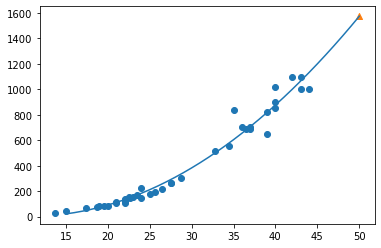

In [76]:
x = np.arange(15, 51)

plt.scatter(train_input, train_target)
plt.scatter(50, lr.predict([[2500, 50]]), marker='^')
plt.plot(x, (a * x ** 2 + b * x + lr.intercept_))

plt.show()

In [77]:
lr.score(test_poly, test_target)

0.9775935108325121

In [79]:
lr.score(train_poly, train_target)

0.9706807451768623

In [ ]:
### (해석)
# 전체적으로 정확도는 높아졌습니다.
# 그렇지만, 훈련/테스트의 결정계수는 유사하게 가까워졌기에,
# 우수한 모델이라고 할 수 있습니다.

# 다만, 아직 훈련이 테스트보다 낮은 과소적합을 보입니다.

### 그럼 어떻게?
# - 복잡도를 줄 수 있는 모델을 찾아야 합니다.